<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    Machine Learning 06
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
  Classification / Linear Classification
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>
طبقه‌بندی خطی

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>


<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

### مثال: رگرسیون خطی در طبقه‌بندی خطی ناموفق است

در این بخش، می‌خواهیم به‌صورت بصری بررسی کنیم که چرا استفاده از روش‌های رگرسیون خطی $(SSE)$ در طبقه‌بندی خطی با شکست مواجه می‌شود:

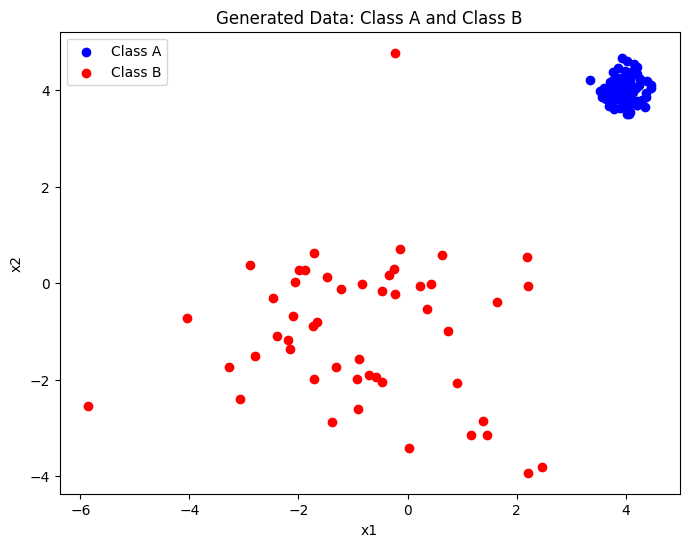

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# تنظیم قفل تصادفی برای تولید نتایج قابل تکرار
np.random.seed(42)

# تولید ۱۰۰ نمونه برای کلاس الف از توزیع گاوسی با مرکز (۴,۴) و واریانس پایین
class_A = np.random.normal(loc=(4, 4), scale=0.25, size=(100, 2))
labels_A = np.ones(class_A.shape[0])  # Label for Class A is 1

# تولید ۵۰ نمونه برای کلاس ب از توزیع گاوسی با مرکز (۱-,۱-) و واریانس بالاتر
class_B = np.random.normal(loc=(-1, -1), scale=1.5, size=(50, 2))
labels_B = np.zeros(class_B.shape[0])  # Label for Class B is 0

# ترکیب ویژگی‌ها و برچسب‌های هر دو کلاس
X = np.vstack((class_A, class_B))  # ترکیب داده‌ها
y = np.hstack((labels_A, labels_B))  # ترکیب برچسب‌ها

# رسم نقاط داده تولید شده
plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label="Class A", color="blue")
plt.scatter(class_B[:, 0], class_B[:, 1], label="Class B", color="red")
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

همانطور که مشاهده می‌کنید، نقاط داده به روش‌های مختلفی به صورت خطی جداپذیر هستند. حالا بیایید یک خط به آنها برازش دهیم:

Model weights: w1 = 0.08, w2 = 0.11, bias = 0.22


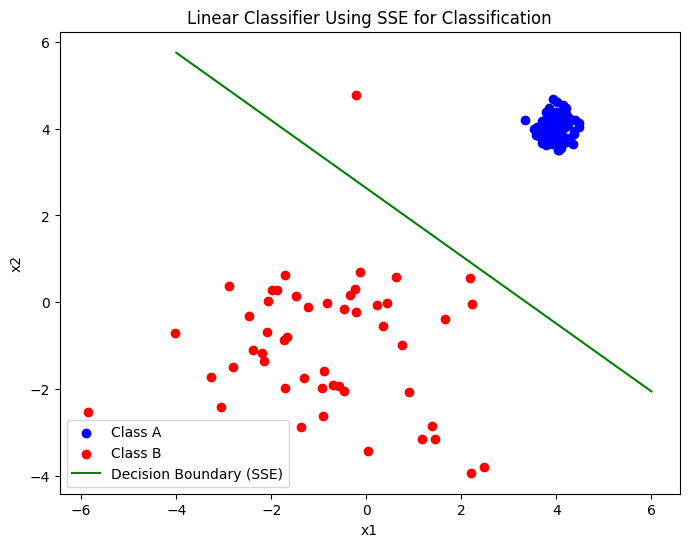

In [32]:
from sklearn.linear_model import LinearRegression

# آموزش یک مدل رگرسیون خطی برای طبقه‌بندی داده‌ها
model = LinearRegression()
model.fit(X, y)


w1, w2 = model.coef_
w0 = model.intercept_

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f}")

# محاسبه مرز تصمیم‌گیری: خروجی مدل را روی ۰.۵ تنظیم کرده و برای x2 حل کنید
x_vals = np.linspace(-4, 6, 100)
decision_boundary = (-w1 * x_vals - w0 + 0.5) / w2

# رسم داده‌ها و مرز تصمیم‌گیری
plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label="Class A", color="blue")
plt.scatter(class_B[:, 0], class_B[:, 1], label="Class B", color="red")
plt.plot(x_vals, decision_boundary, label="Decision Boundary (SSE)", color="green")
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

حتی بهترین خط برازش شده نیز در طبقه‌بندی نقاط ناموفق است. **آیا می‌توانید دلیل آن را توضیح دهید؟**

# داده‌های جداپذیر خطی و داده‌های جداپذیر غیرخطی

در این بخش، داده‌های جداپذیر خطی و داده‌های جداپذیر غیرخطی را به صورت بصری نمایش خواهیم داد.

## داده‌های جداپذیر خطی

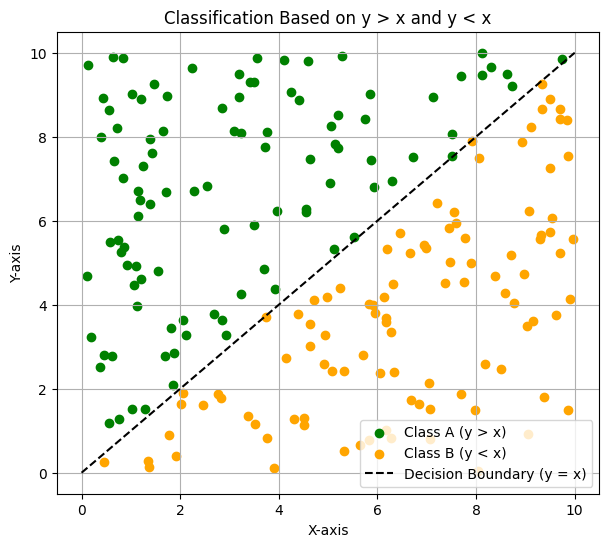

In [33]:
def generate_ab_class(n_points=100):
    class_A = []  
    class_B = [] 
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 10)  
        y = np.random.uniform(0, 10) 
        if y > x and len(class_A) < n_points:
            class_A.append([x, y])
        elif y < x and len(class_B) < n_points:
            class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

class_A, class_B = generate_ab_class()

plt.figure(figsize=(7, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], color="green", label="Class A (y > x)")
plt.scatter(class_B[:, 0], class_B[:, 1], color="orange", label="Class B (y < x)")
plt.plot([0, 10], [0, 10], color="black", linestyle="--", label="Decision Boundary (y = x)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Classification Based on y > x and y < x")
plt.legend()
plt.grid(True)
plt.show()

## داده‌های جداپذیر غیرخطی (مسئله $XOR$)

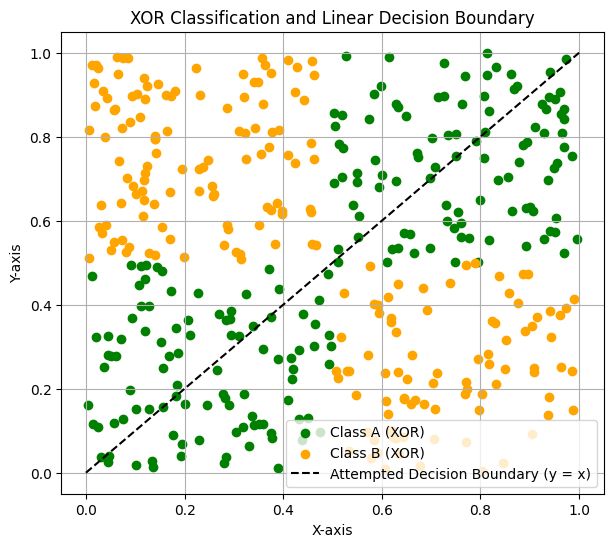

In [34]:
def generate_xor_data(n_points=200, seed=42):
    np.random.seed(seed)
    class_A = [] 
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 1) 
        y = np.random.uniform(0, 1)
        if (x > 0.5 and y > 0.5) or (x < 0.5 and y < 0.5):
            if len(class_A) < n_points:
                class_A.append([x, y])
        else: 
            if len(class_B) < n_points:
                class_B.append([x, y])
    return np.array(class_A), np.array(class_B)


class_A_xor, class_B_xor = generate_xor_data()

plt.figure(figsize=(7, 6))
plt.scatter(class_A_xor[:, 0], class_A_xor[:, 1], color="green", label="Class A (XOR)")
plt.scatter(class_B_xor[:, 0], class_B_xor[:, 1], color="orange", label="Class B (XOR)")
plt.plot([0, 1], [0, 1], color="black", linestyle="--", label="Attempted Decision Boundary (y = x)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("XOR Classification and Linear Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

## داده‌های جداپذیر غیرخطی (نقاط داده دایره‌ای)

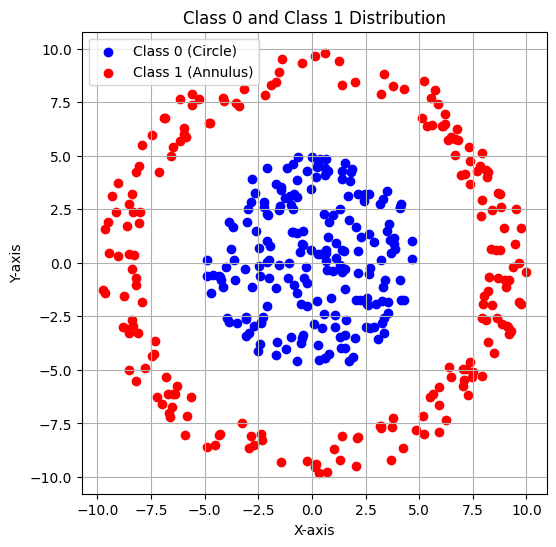

In [35]:
# Function to generate two classes of 2D points:
# - Class 0: points within a circle (radius 5)
# - Class 1: points in a ring/annulus (radius between 8 and 10)
def generate_data(n_points=200, seed=42):
    np.random.seed(seed)  # Set seed for reproducibility

    # Class 0: Points inside a circle of radius 5
    radius_0 = 5
    theta_0 = np.random.uniform(0, 2 * np.pi, n_points)  # Random angles [0, 2π]
    r_0 = radius_0 * np.sqrt(np.random.uniform(0, 1, n_points))  # Uniform distribution over circle area
    x0 = r_0 * np.cos(theta_0)  # Convert polar to Cartesian (x-coordinates)
    y0 = r_0 * np.sin(theta_0)  # Convert polar to Cartesian (y-coordinates)
    class_0 = np.vstack((x0, y0)).T  # Stack into a 2D array of shape (n_points, 2)

    # Class 1: Points in an annulus (ring) between radii 8 and 10
    inner_radius_1 = 8
    outer_radius_1 = 10
    theta_1 = np.random.uniform(0, 2 * np.pi, n_points)  # Random angles [0, 2π]
    # Radius values uniformly sampled from the area of the annulus
    r_1 = np.sqrt(np.random.uniform(inner_radius_1**2, outer_radius_1**2, n_points))
    x1 = r_1 * np.cos(theta_1)  # Convert to x-coordinates
    y1 = r_1 * np.sin(theta_1)  # Convert to y-coordinates
    class_1 = np.vstack((x1, y1)).T  # Stack into shape (n_points, 2)

    return class_0, class_1  # Return both classes as numpy arrays

# Generate the dataset
class_0, class_1 = generate_data()

# Plot the generated points
plt.figure(figsize=(6, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color="blue", label="Class 0 (Circle)")
plt.scatter(class_1[:, 0], class_1[:, 1], color="red", label="Class 1 (Annulus)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Class 0 and Class 1 Distribution")
plt.legend()
plt.axis("equal")  # Keep aspect ratio 1:1
plt.grid(True)
plt.show()

# طبقه‌بند پرسپترون از پایه

در این بخش، یک طبقه‌بند پرسپترون را از پایه پیاده‌سازی خواهیم کرد.

In [36]:
class Percep:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.errors_ = []  # Track number of misclassifications per epoch

    def fit(self, X, y):
        """
        Train the Perceptron model on the training data.

        Parameters:
        - X: array-like, shape = [n_samples, n_features]
          Input features.
        - y: array-like, shape = [n_samples]
          Target labels: +1 or -1.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zero
        self.bias = 0.0  # Initialize bias to zero

        for epoch in range(self.n_epochs):
            errors = 0
            for idx in range(n_samples):
                # Calculate linear output (dot product + bias)
                linear_output = np.dot(X[idx], self.weights) + self.bias
                y_pred = self._unit_step(linear_output)

                # If misclassified, update weights and bias
                if y[idx] != y_pred:
                    update = self.learning_rate * y[idx]
                    self.weights += update * X[idx]
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)

            # Stop early if no misclassifications
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break

    def predict(self, X):
        """
        Predict class labels using the learned weights.

        Parameters:
        - X: array-like, shape = [n_samples, n_features]

        Returns:
        - Array of predicted labels (+1 or -1)
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)

    def _unit_step(self, x):
        # Unit step function: returns 1 if x >= 0, else -1
        return np.where(x >= 0, 1, -1)

آماده‌سازی مجموعه داده (ترکیب کلاس‌های $A$ و $B$ از سلول‌های قبلی)

In [37]:
# Stack data from class_A and class_B
X_ab = np.vstack((class_A, class_B))

# Create labels: +1 for class A, -1 for class B
y_ab = np.hstack((np.ones(class_A.shape[0]), -np.ones(class_B.shape[0])))

# Shuffle the data and labels together to avoid ordered data
shuffle_idx = np.random.permutation(len(X_ab))
X_ab, y_ab = X_ab[shuffle_idx], y_ab[shuffle_idx]

# Display sample data and labels
print("Combined Data Sample Points:\n", X_ab[:5])
print("Combined Labels:\n", y_ab[:5])

Combined Data Sample Points:
 [[0.43159912 8.91143114]
 [5.74473113 8.41828777]
 [9.38340457 1.81233066]
 [1.12038902 3.97855599]
 [5.20163501 8.521815  ]]
Combined Labels:
 [ 1.  1. -1.  1.  1.]


آموزش پرسپترون

In [38]:
# Create an instance of Perceptron with learning rate and max epochs
percept = Percep(learning_rate=0.01, n_epochs=1000)

# Train the perceptron model on the dataset
percept.fit(X_ab, y_ab)

# Display the final weights and bias
print(f"Final Weights: {percept.weights}")
print(f"Final Bias: {percept.bias}")

Converged after 8 epochs
Final Weights: [-0.43518699  0.43607194]
Final Bias: -0.01


نمایش مرز تصمیم‌گیری و نواحی تصمیم‌گیری

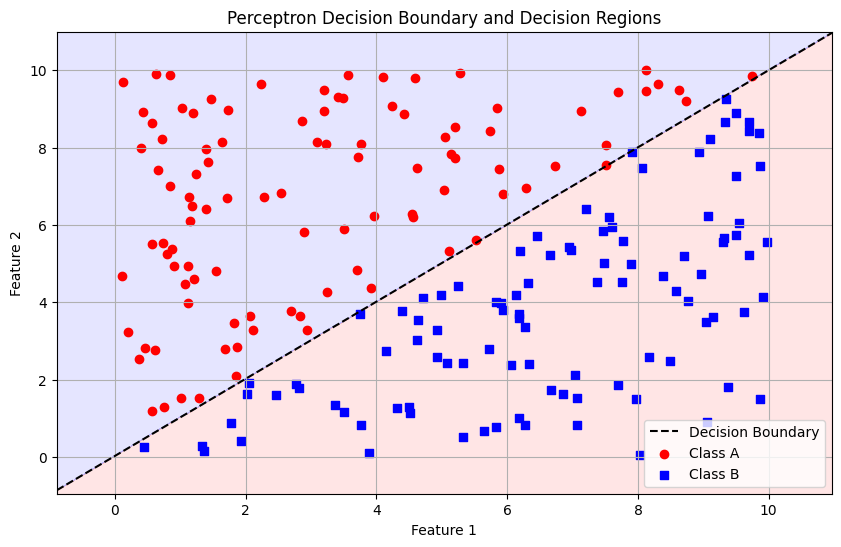

In [39]:
from matplotlib.colors import ListedColormap

# Define range of the plot
x_min, x_max = X_ab[:, 0].min() - 1, X_ab[:, 0].max() + 1
y_min, y_max = X_ab[:, 1].min() - 1, X_ab[:, 1].max() + 1

# Create a grid of points to classify
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]  # Flatten meshgrid into (n_samples, 2)
Z = percept.predict(grid)          # Predict each point in the grid
Z = Z.reshape(xx.shape)               # Reshape prediction for contour plot

# Define color maps for background and points
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])  # Light red/blue for regions
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])   # Bold red/blue for points

plt.figure(figsize=(10, 6))

# Fill background with decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Draw decision boundary (line where prediction = 0)
if percept.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(percept.weights[0] * x_vals + percept.bias) / percept.weights[1]
    plt.plot(x_vals, y_vals, "k--", label="Decision Boundary")
else:
    # Vertical decision boundary if weight for y is zero
    x_val = -percept.bias / percept.weights[0]
    plt.axvline(x=x_val, color="k", linestyle="--", label="Decision Boundary")

# Plot original data points
plt.scatter(class_A[:, 0], class_A[:, 1], color="red", marker="o", label="Class A")
plt.scatter(class_B[:, 0], class_B[:, 1], color="blue", marker="s", label="Class B")

# Axis and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary and Decision Regions")
plt.legend()
plt.grid(True)
plt.show()

# داده‌های نامتوازن

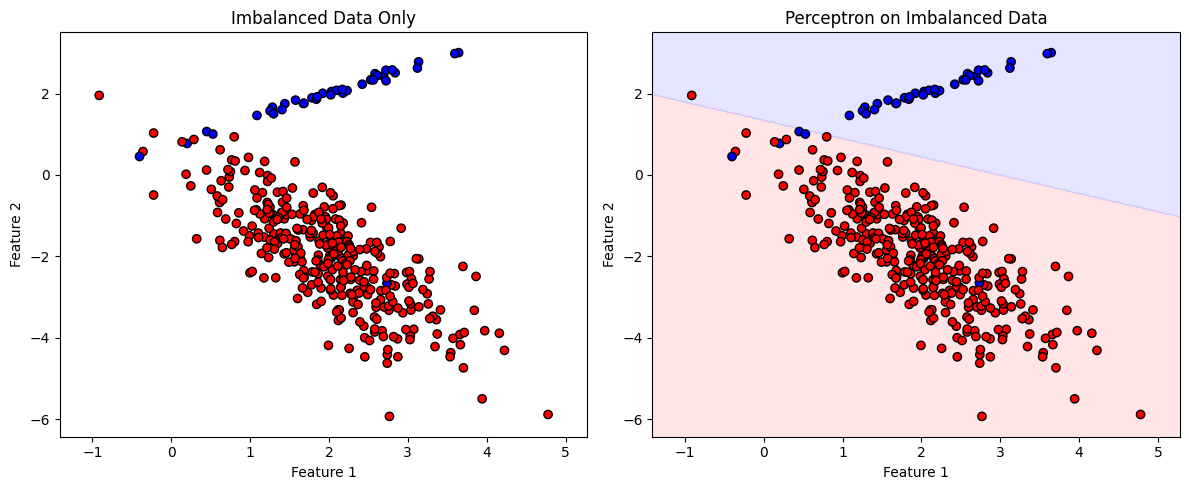

In [40]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generate a synthetic 2D binary classification dataset with class imbalance (90% vs 10%)
X, y = make_classification(
    n_classes=2,            # Binary classification
    class_sep=2,            # Distance between classes (for separability)
    weights=[0.9, 0.1],     # Class imbalance (90% class 0, 10% class 1)
    n_informative=2,        # Number of informative features
    n_redundant=0,          # No redundant features
    n_features=2,           # Only 2 features for easy visualization
    n_clusters_per_class=1,
    n_samples=500,
    random_state=42
)

# Split into training and test sets, maintaining class ratio (stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Initialize and train a Perceptron on imbalanced data
clf = Perceptron()
clf.fit(X_train, y_train)

# Function to plot the decision boundary of a classifier
def plot_decision_boundary(ax, X, y, model=None, title=""):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    if model is not None:
        # Predict class label for each point on the grid
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        # Show regions based on prediction
        ax.contourf(xx, yy, Z, cmap=ListedColormap(["#FFCCCC", "#CCCCFF"]), alpha=0.5)

    # Plot training data
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["red", "blue"]), edgecolor="k")
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Plot the raw imbalanced data and the decision boundary learned by Perceptron
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Left: original data only
plot_decision_boundary(axs[0], X_train, y_train, model=None, title="Imbalanced Data Only")

# Right: decision boundary learned on imbalanced data
plot_decision_boundary(axs[1], X_train, y_train, model=clf, title="Perceptron on Imbalanced Data")

plt.tight_layout()
plt.show()

## نمونه‌گیری اضافی ($SMOTE$)

اعمال $SMOTE$ (تکنیک نمونه‌گیری اضافی مصنوعی از کلاس اقلیت)

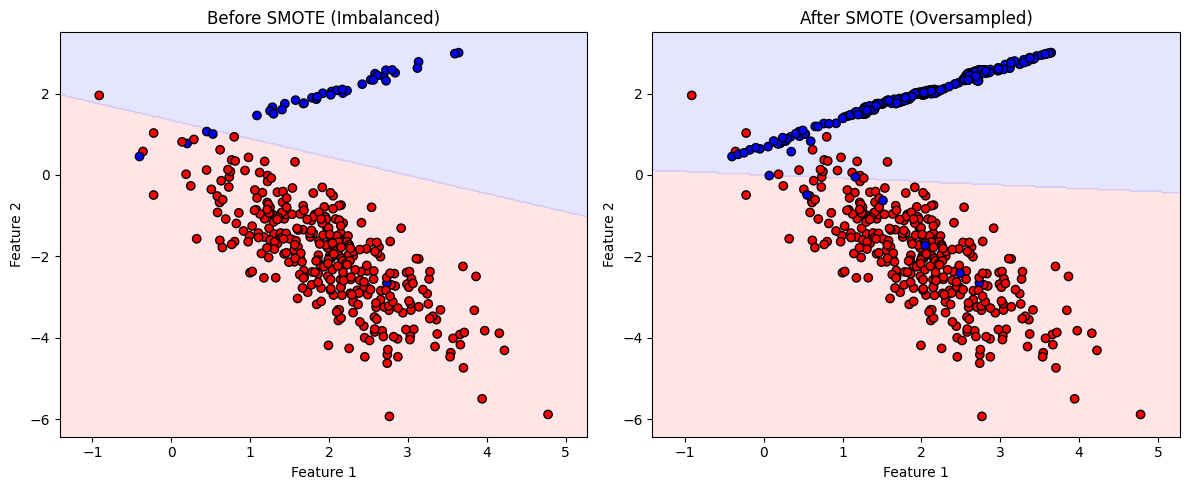

In [41]:
from imblearn.over_sampling import SMOTE 
# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a new Perceptron on the resampled (balanced) data
clf_smote = Perceptron()
clf_smote.fit(X_resampled, y_resampled)

# Plot decision boundaries before and after SMOTE
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(axs[0], X_train, y_train, model=clf, title="Before SMOTE (Imbalanced)")
plot_decision_boundary(axs[1], X_resampled, y_resampled, model=clf_smote, title="After SMOTE (Oversampled)")

plt.tight_layout()
plt.show()

## نمونه‌گیری کاهشی

اعمال نمونه‌گیری کاهشی تصادفی

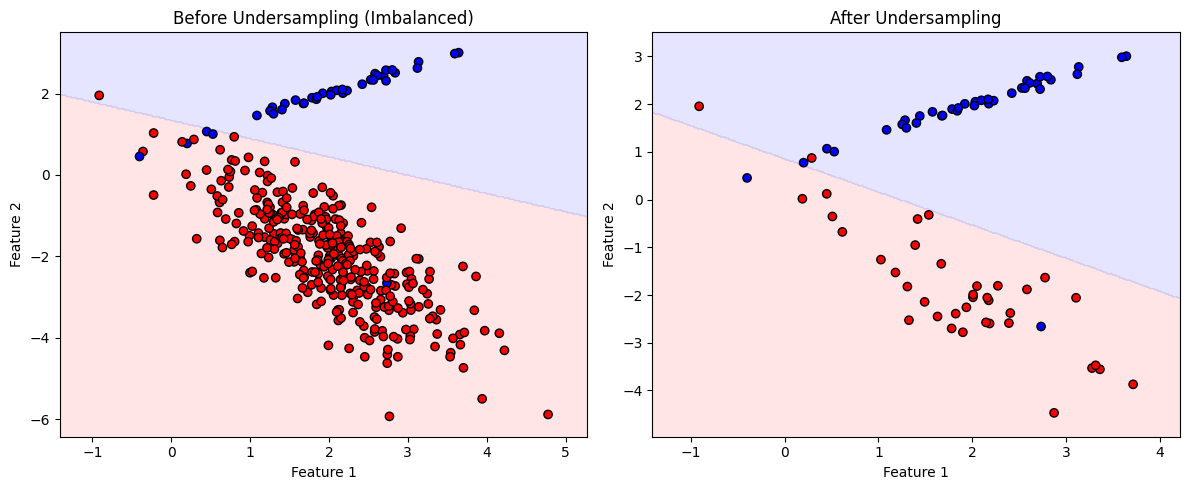

In [42]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to reduce the majority class
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train, y_train)

# Train a new Perceptron on the undersampled (balanced) data
clf_under = Perceptron()
clf_under.fit(X_under, y_under)

# Plot decision boundaries before and after undersampling
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(axs[0], X_train, y_train, model=clf, title="Before Undersampling (Imbalanced)")
plot_decision_boundary(axs[1], X_under, y_under, model=clf_under, title="After Undersampling")

plt.tight_layout()
plt.show()

# مثال دنیای واقعی: سرطان پستان

اجازه دهید مجدداً به مجموعه داده سرطان پستان مراجعه کنیم
   - دو ویژگی $mean radius$ و $mean texture$ را برای اهداف بصری‌سازی انتخاب کنید
   - مجموعه داده را به مجموعه‌های آموزش و آزمون تقسیم کنید

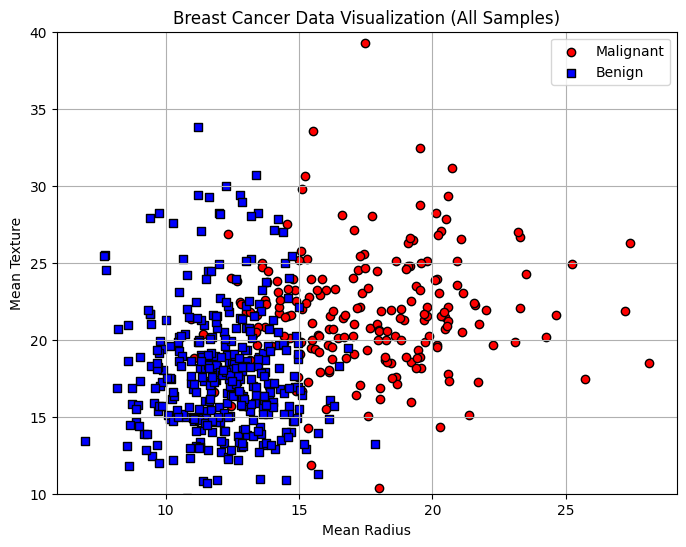

In [43]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load breast cancer dataset from scikit-learn
data = load_breast_cancer()
X = data.data
y = data.target  # Labels: 0 = malignant, 1 = benign

# Convert to pandas DataFrame for easy handling
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Select two features for visualization and classification
selected_features = ["mean radius", "mean texture"]
X_selected = df[selected_features].values
y_selected = y  # Use full target array

# Scatter plot of the selected features
plt.figure(figsize=(8, 6))

# Class 0: Malignant (red)
plt.scatter(X_selected[y_selected == 0, 0], X_selected[y_selected == 0, 1],
            color="red", marker="o", edgecolor="k", label="Malignant")

# Class 1: Benign (blue)
plt.scatter(X_selected[y_selected == 1, 0], X_selected[y_selected == 1, 1],
            color="blue", marker="s", edgecolor="k", label="Benign")

# Plot styling
plt.ylim(10, 40)
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("Breast Cancer Data Visualization (All Samples)")
plt.legend()
plt.grid(True)
plt.show()

تقسیم داده به ۸۰٪ آموزش و ۲۰٪ آزمون

In [44]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test), maintaining class distribution (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 455
Testing samples: 114


آموزش پرسپترون روی مجموعه آموزش

In [45]:
# Convert class labels to Perceptron-friendly format: 0 -> -1, 1 -> +1
y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)

# Initialize and train a custom Perceptron (your own implementation)
percept = Percep(learning_rate=0.01, n_epochs=1000)
percept.fit(X_train, y_train_perceptron)

# Display final learned weights and bias
print(f"Final Weights: {percept.weights}")
print(f"Final Bias: {percept.bias}")

Final Weights: [-1.63173 -0.3517 ]
Final Bias: 30.740000000002006


همانطور که به خاطر دارید، نمونه‌ها به صورت خطی جداپذیر نیستند. می‌توانیم انتظار داشته باشیم که تعداد طبقه‌بندی‌های نادرست به ۰ همگرا نشود

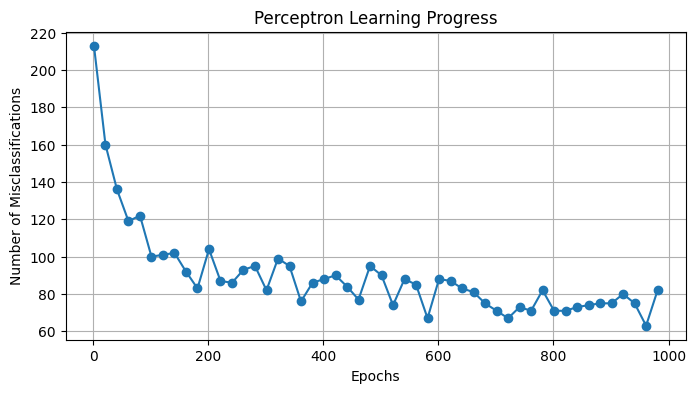

In [46]:
# Plot number of misclassified samples every 20 epochs
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(percept.errors_) + 1, 20), percept.errors_[::20], marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.title("Perceptron Learning Progress")
plt.grid(True)
plt.show()

رسم مرز تصمیم‌گیری پرسپترون روی مجموعه آزمون

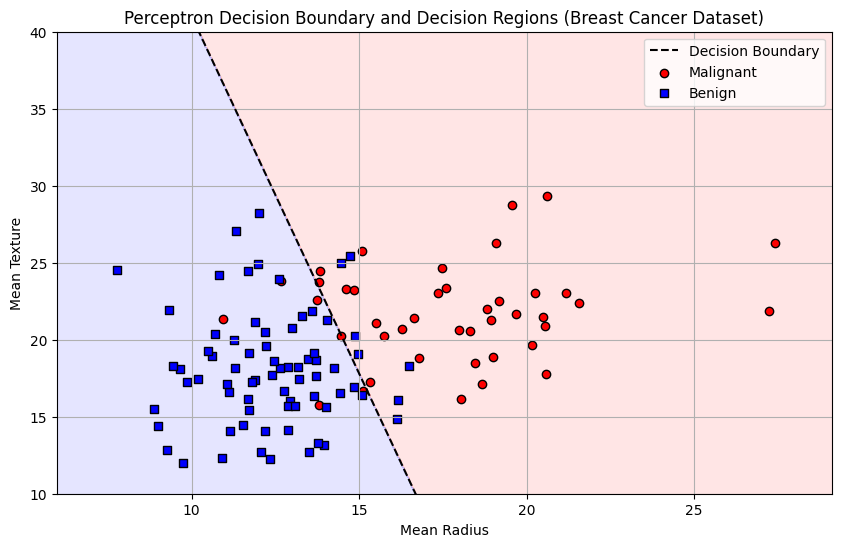

In [47]:
# Create a mesh grid for plotting decision regions
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict labels for each point on the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = percept.predict(grid)
Z = Z.reshape(xx.shape)

# Define color maps for regions and class markers
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])  # Background colors
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])   # Point colors

plt.figure(figsize=(10, 6))

# Draw decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Draw decision boundary as a dashed line
if percept.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(percept.weights[0] * x_vals + percept.bias) / percept.weights[1]
    plt.plot(x_vals, y_vals, "k--", label="Decision Boundary")
else:
    x_val = -percept.bias / percept.weights[0]
    plt.axvline(x=x_val, color="k", linestyle="--", label="Decision Boundary")

# Plot test data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            color="red", marker="o", edgecolor="k", label="Malignant")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color="blue", marker="s", edgecolor="k", label="Benign")

plt.ylim(10, 40)
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("Perceptron Decision Boundary and Decision Regions (Breast Cancer Dataset)")
plt.legend()
plt.grid(True)
plt.show()


<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
